# Load the dataset

In [1]:
from google.colab import files
uploaded = files.upload()

Saving loan_data.csv to loan_data (4).csv


# Preprocessing the dataset

In [53]:
import pandas as pd

df = pd.read_csv("loan_data.csv")
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


Create a pie chart for paid vs not paid

0    8045
1    1533
Name: not.fully.paid, dtype: int64


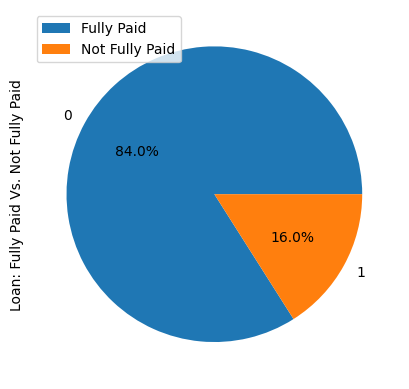

In [54]:
#We split the data using value_counts(). It seperates the different data.
import matplotlib.pyplot as plt
count = ""
count = df["not.fully.paid"].value_counts()

print(count)

#autocpt provides us with the percentage values
count.plot(kind = 'pie', autopct='%1.1f%%')
plt.ylabel("Loan: Fully Paid Vs. Not Fully Paid")
plt.legend(["Fully Paid", "Not Fully Paid"])


There is no null data so we can proceed with train test split. However the **purpose** column is not continous so we will encode it into continous value. **`NOTE: Need to understand encoding(get.dummies method)`**

In [55]:
encoded_loan_data = pd.get_dummies(df, prefix="purpose", drop_first=True)
encoded_loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   credit.policy               9578 non-null   int64  
 1   int.rate                    9578 non-null   float64
 2   installment                 9578 non-null   float64
 3   log.annual.inc              9578 non-null   float64
 4   dti                         9578 non-null   float64
 5   fico                        9578 non-null   int64  
 6   days.with.cr.line           9578 non-null   float64
 7   revol.bal                   9578 non-null   int64  
 8   revol.util                  9578 non-null   float64
 9   inq.last.6mths              9578 non-null   int64  
 10  delinq.2yrs                 9578 non-null   int64  
 11  pub.rec                     9578 non-null   int64  
 12  not.fully.paid              9578 non-null   int64  
 13  purpose_credit_card         9578 

In [56]:
#This is the input. All columns except the not.full.paid
X = encoded_loan_data.drop('not.fully.paid',axis=1)
#not.full.paid is the output
y = encoded_loan_data['not.fully.paid']


# Split data into test and training set

In [57]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

We know that there are alot more paid than not paid therefore we can sample the data in two ways.


1.   **Undersampling:** We will undersample paid, the majority class
2.   **SMOTE Oversampling:** We will create new data to increase minority class

We will be undersampling



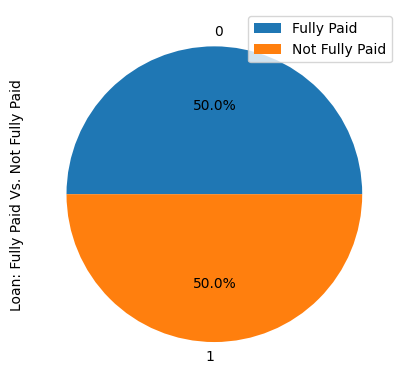

In [58]:
#We create a copy of X_train
X_train_cp = X_train.copy()
#We add 'not.full.paid' using values from y_train to the copy
X_train_cp['not.fully.paid'] = y_train
#We split the data into 0, i.e, paid and 1, i.e, not paid
y_0 = X_train_cp[X_train_cp['not.fully.paid'] == 0]
y_1 = X_train_cp[X_train_cp['not.fully.paid'] == 1]

#Then we undersample
y_0_undersample = y_0.sample(y_1.shape[0])
loan_data_undersample = pd.concat([y_0_undersample, y_1], axis = 0)

#Creating pie chart
count = ""
count = loan_data_undersample["not.fully.paid"].value_counts()

count.plot(kind = 'pie', autopct='%1.1f%%')
plt.ylabel("Loan: Fully Paid Vs. Not Fully Paid")
plt.legend(["Fully Paid", "Not Fully Paid"])

# Fit classification models
We will be using


1.   Logistic Regression
2.   Support Vector Machine(SVM)
3.   Random Forest




In [59]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score

## Logistic Regression

In [60]:
from sklearn.linear_model import LogisticRegression
logistic_regression = LogisticRegression(max_iter = 3000)
logistic_regression.fit(X_train,y_train)
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6704 entries, 872 to 2732
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   credit.policy               6704 non-null   int64  
 1   int.rate                    6704 non-null   float64
 2   installment                 6704 non-null   float64
 3   log.annual.inc              6704 non-null   float64
 4   dti                         6704 non-null   float64
 5   fico                        6704 non-null   int64  
 6   days.with.cr.line           6704 non-null   float64
 7   revol.bal                   6704 non-null   int64  
 8   revol.util                  6704 non-null   float64
 9   inq.last.6mths              6704 non-null   int64  
 10  delinq.2yrs                 6704 non-null   int64  
 11  pub.rec                     6704 non-null   int64  
 12  purpose_credit_card         6704 non-null   uint8  
 13  purpose_debt_consolidation  670

Predict data and create classification report along with confusion matrix.

In [61]:
prediction_values = logistic_regression.predict(X_test)

#creating a confusion matrix
print(confusion_matrix(y_test, prediction_values))

#creating a classification report
print(classification_report(y_test,prediction_values))

#precision
print(precision_score(y_test, prediction_values))

[[2395   11]
 [ 461    7]]
              precision    recall  f1-score   support

           0       0.84      1.00      0.91      2406
           1       0.39      0.01      0.03       468

    accuracy                           0.84      2874
   macro avg       0.61      0.51      0.47      2874
weighted avg       0.77      0.84      0.77      2874

0.3888888888888889


## Support Vector Machine(SVM)

SVC kernek = linear

In [62]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
#as training the model was taking too long I scaled it
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

svc_classifier = SVC(kernel='linear')
svc_classifier.fit(X_train, y_train)

SVC(kernel='linear')

Predict data and create classification report along with confusion matrix.

In [63]:
prediction_values = svc_classifier.predict(X_test)

#creating a confusion matrix
print(confusion_matrix(y_test, prediction_values))

#creating a classification report
print(classification_report(y_test,prediction_values))

#precision
print(precision_score(y_test, prediction_values))

[[2406    0]
 [ 468    0]]
              precision    recall  f1-score   support

           0       0.84      1.00      0.91      2406
           1       0.00      0.00      0.00       468

    accuracy                           0.84      2874
   macro avg       0.42      0.50      0.46      2874
weighted avg       0.70      0.84      0.76      2874

0.0


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

## Random Forest

In [64]:
from sklearn.ensemble import RandomForestClassifier

random_forest_classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
random_forest_classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

Predict data and create classification report along with confusion matrix.

In [65]:
prediction_values = random_forest_classifier.predict(X_test)

#creating a confusion matrix
print(confusion_matrix(y_test, prediction_values))

#creating a classification report
print(classification_report(y_test,prediction_values))

#precision
print(precision_score(y_test, prediction_values))

[[2370   36]
 [ 452   16]]
              precision    recall  f1-score   support

           0       0.84      0.99      0.91      2406
           1       0.31      0.03      0.06       468

    accuracy                           0.83      2874
   macro avg       0.57      0.51      0.48      2874
weighted avg       0.75      0.83      0.77      2874

0.3076923076923077


# Conclusion
From the above three models the best one for our purpose is **Logistic Regression** as it has the highest precesion score(0.388).

We chose precison score as our evaluation metric as for this specific case the cost of False Positives >>>> False Negatives.